#### Exploratory Data Analysis
#### Name :  Yukti Patil 

<p>The data set contains data about a marketing campaign conducted by a Portuguese banking institution to determine if clients would subscribe to a term deposit.</p>
<p> Let us try to answer : <h4>What and how the other features affect the subscription to a term deposit and if the campaign was successful ?</h4></p>

<h2> 1 .Import relevant libraries and using Pandas load the dataset, Initial Observations </h2>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('./bank.csv')

In [58]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


A quick glance at the data set set reveals that there are 17 columns in total namely age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays,previous, poutcome, subscribed.

In [59]:
df.shape

(2000, 17)

There are 2000 rows or records and 17 column or attributes in the bank data set.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


Using the ‘info’ command, in-depth details about the attributes in the data set can be obtained. For example, in the bank data set used, ‘age is a non-null attribute with type integer, ‘job’ is a non-null attribute with type object. Type object means that the attribute or variable is a categorical value.

<h3> 1.1 List all the columns in the dataset</h3>

In [61]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

<h3>1.2 List all the categorical features and their values in the dataset</h3>

In [62]:
print("Job: \n", df['job'].unique(),'\n')
print("Marital Status: \n", df['marital'].unique(),'\n')
print("Education: \n", df['education'].unique(),'\n')
print("Default on Credit: \n", df['default'].unique(),'\n')
print("Housing loan: \n", df['housing'].unique(),'\n')
print("Loan default: \n", df['loan'].unique(),'\n')
print("Contact type: \n", df['contact'].unique(),'\n')
print("Months: \n", df['month'].unique(),'\n')
print("Day: \n", df['day'].unique(),'\n')
print("Poutcome: \n",df["poutcome"].unique(),'\n')

Job: 
 ['technician' 'retired' 'blue-collar' 'self-employed' 'services'
 'management' 'admin.' 'unemployed' 'student' 'entrepreneur' 'housemaid'
 nan] 

Marital Status: 
 ['single' 'divorced' 'married'] 

Education: 
 ['tertiary' 'secondary' nan 'primary'] 

Default on Credit: 
 ['no' 'yes'] 

Housing loan: 
 ['yes' 'no'] 

Loan default: 
 ['no' 'yes'] 

Contact type: 
 ['cellular' 'telephone' nan] 

Months: 
 ['apr' 'dec' 'feb' 'jan' 'mar' 'may' 'nov' 'oct' 'aug' 'jul' 'jun' 'sep'] 

Day: 
 [ 1  2  3 20  4  7  9 10 14 16 17 18 21 24 28 29 30  5  6 11 13 19 26 27
  8 12 22 25 15 23 31] 

Poutcome: 
 ['failure' 'other' 'success' nan] 



Looking at categorical values, we can see Education, Contact type, Poutcome contain 'nan' values.

<h3>1.3 Find out the missing values for each attribute</h3>

In [63]:
df.isnull().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

The missing values will have to be cleaned during data cleaning. 

<h2>2. Statistical Summary of Numerical Attributes </h2>

In [64]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


<h4>Observation - Statistical Summary</h4>
From the above we can observe the following:

<p>age: minimum age of the bank’s customer is 18 while the maximum age is 93. The average age of the customers is 41.</p>
balance: the mean customer balance is 1413.66, while the minimum balance is -980.00. The maximum balance stands at 81204.00.</p>
<p>duration: the maximum duration in seconds of a single contact was 1823 seconds, while the shortest duration of a contact with a client lasted for 7 seconds.</p>
<p>campaign: the maximum number of contacts made in the campaign to a single client is 11 while the minimum number of contacts is 1. The average number of contacts made was 1.9.</p>
<p>pdays: a maximum of 854 days passed by after a client was last contacted, while a minimum of -1 days passed by after a client was last contacted.</p>
<p>previous: a maximum of 55 contacts were made previously to a single client before the current campaign., while a minimum of 0 contacts were previously made.</p>

<h2> 3. Heat Map </h2>

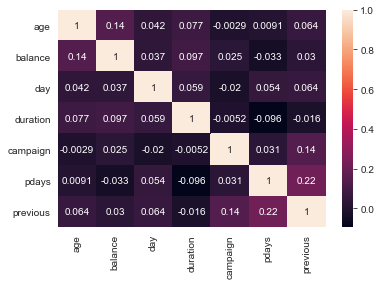

In [65]:
#correlation matrix
sns.heatmap(df.corr(),annot=True);

<h4>Observation </h4> It is evident from the graph that pdays and previous are highly correlated.

<h2>4. Compare Subscribed as a primary attribute with other Categorical features  </h2>
Subscribed - indicates has the client subscribed a term deposit?
From the description of the data, The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

I have compared the primary attribute "Subscribed" with the other columns.

<AxesSubplot:ylabel='subscribed'>

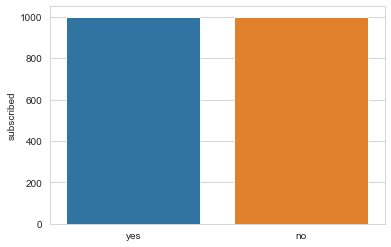

In [66]:
#4.1
value_counts = df['subscribed'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts)

<h4>4.1 Observation - Subscribed for term deposit </h4> The above plot shows that the difference between the number of people subscribed and who did not subscribe for the term deposit isn't large.

<AxesSubplot:title={'center':'Job and Subscribed for Deposit'}>

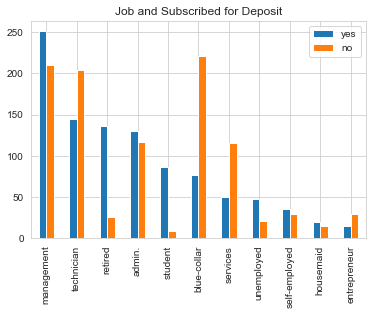

In [67]:
#4.2
job_df = pd.DataFrame()

job_df['yes'] = df[df['subscribed'] == 'yes']['job'].value_counts()
job_df['no'] = df[df['subscribed'] == 'no']['job'].value_counts()

job_df.plot.bar(title = 'Job and Subscribed for Deposit')

<h4>4.2 Observation - Jobs and Subscribed for term deposit</h4>
From the above plot, we can observe the customers who have job in management have the highest rate of subscribing a term deposit. But they are also, one of the highest along with customers in blue-collar jobs when it comes to not subscribing.
The reasons for this could be the number of customers working in the management field as compared to other fields. 

<AxesSubplot:title={'center':'Marital status and Subscribed for Deposit'}>

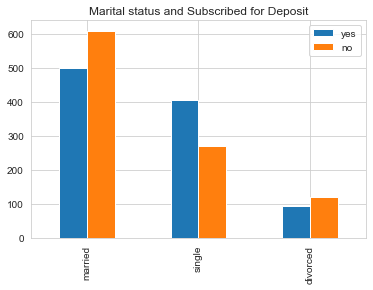

In [68]:
#4.3
married_df = pd.DataFrame()

married_df['yes'] = df[df['subscribed'] == 'yes']['marital'].value_counts()
married_df['no'] = df[df['subscribed'] == 'no']['marital'].value_counts()

married_df.plot.bar(title = 'Marital status and Subscribed for Deposit')

<h4>4.3 Observation : Marital Status </h4> The plot indicates majority of the customers are married, followed by single and divorced.

<AxesSubplot:title={'center':'Education and Subscribed for Deposit'}>

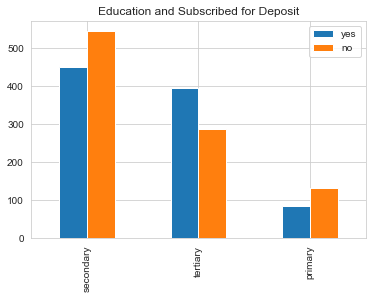

In [69]:
#4.4
education_df = pd.DataFrame()

education_df['yes'] = df[df['subscribed'] == 'yes']['education'].value_counts()
education_df['no'] = df[df['subscribed'] == 'no']['education'].value_counts()

education_df.plot.bar(title = 'Education and Subscribed for Deposit')

<h4>4.4 Observation : Education and Subscribed for term deposit</h4>
There are more customers who took secondary education subscribed to the term deposit.

<AxesSubplot:title={'center':'Type of contact and Subscribed for Deposit'}>

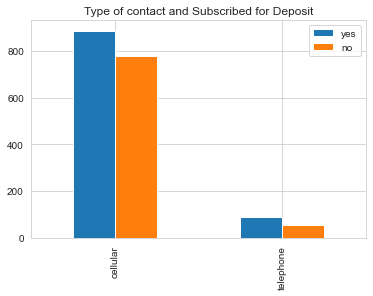

In [70]:
#4.5
contact_df = pd.DataFrame()

contact_df['yes'] = df[df['subscribed'] == 'yes']['contact'].value_counts()
contact_df['no'] = df[df['subscribed'] == 'no']['contact'].value_counts()

contact_df.plot.bar(title = 'Type of contact and Subscribed for Deposit')

<h4>4.5 Observation : Type of Contact and Subscribed for term deposit</h4>
The Customers with contact type "Cellular" have less subscribed to the term deposit.


<h2>5. Analysis of Numerical Attributes </h2>
<h4>5.1 Age Distribution </h4>
<h4>5.2 Bar Plot - Age vs Subscribed</h4>
<h4>5.3 Bar Plot - Balance vs Subscribed</h4>
<h4>5.4 Box Plot - Age</h4>
<h4>5.5 Box Plot - Age vs Subscribed</h4>
<h4>5.6 Violin Plot - Subscribed, Campaign, Housing </h4>
<h4>5.7 CrossTab- Stacked Bar - Campaign(contacted) vs Subscribed </h4>

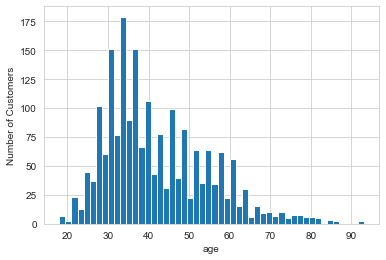

In [71]:
#5.1
df['age'].hist(bins=50)
plt.xlabel('age')
plt.ylabel('Number of Customers')
plt.show()

<h4>Observation 5.1 </h4> the plot above shows the age distribution of customers 

<AxesSubplot:xlabel='subscribed', ylabel='age'>

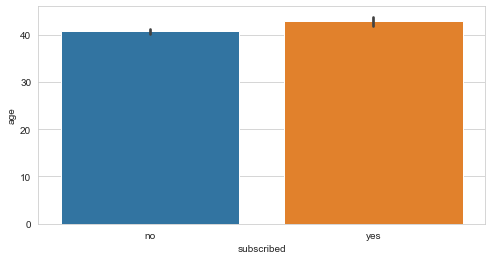

In [72]:
#5.2
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
sns.barplot(x=df['subscribed'], y = df['age'])

<h4>Observation 5.2</h4> there are more client between the ages of 0 and 40 who subscribed to the term deposit than those who did not.

<AxesSubplot:xlabel='subscribed', ylabel='balance'>

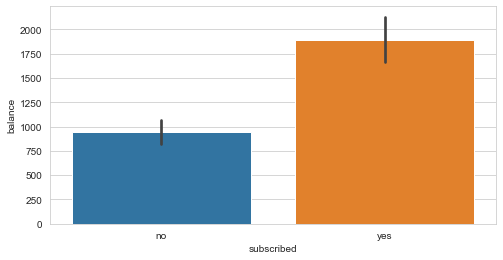

In [73]:
#5.3
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
sns.barplot(x=df['subscribed'], y = df['balance'])

<h4>Observation 5.3</h4> there are more clients with a balance between 0 and 1750 who subscribed to the term deposit than those who did not

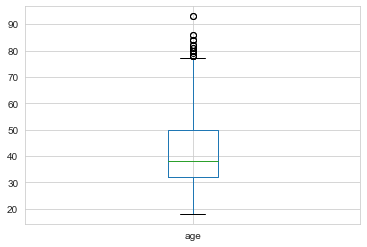

In [74]:
#5.4
df.boxplot(column='age')
plt.show()

<h4>Observation 5.4</h4> The box plot above confirms the presence of a lot of outliers/extreme values. The customers show maximum people between the ages 32 t0 50 . This may be attributed to the customers that were most called during the campaign. Let us segregate them by `Subscribed`.

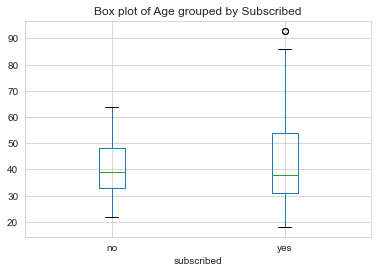

In [75]:
#5.5
df.boxplot(column='age', by='subscribed')
plt.title('Box plot of Age grouped by Subscribed')
plt.suptitle("") 
plt.show()

<h4>Observation 5.5 </h4>From the above boxplot we know that for both the customers that subscibed or didn’t subscribe a term deposit, has a median age of around 38–40. And the boxplot for both the classes overlap quite a lot, which means that age isn’t necessarily a good indicator for which customer will subscribe and which customer will not.

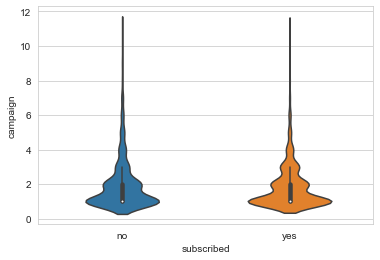

In [76]:
#5.6 
sns.violinplot(data=df, x='subscribed', y='campaign',orient='v', width=0.5)
plt.show()

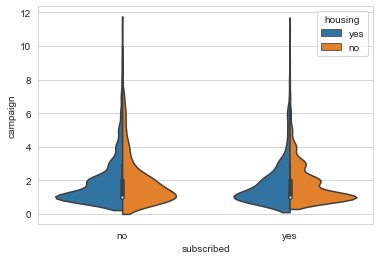

In [77]:
#5.6
sns.violinplot(data=df, x='subscribed', y='campaign', hue='housing', split=True)
plt.show()

<h4>Observation 5.6 </h4>The plot above suggest that customers in our dataset that do not have housing loan, were contacted more who subscribed. It also indiacates most customers did not have housing loans.
However, there isn't much difference between customers who did not subscribed and the distribution of housing loan.This does not provide a good indicator if the people with housing loans were contacted more and subscribed. Other features could be checked for.


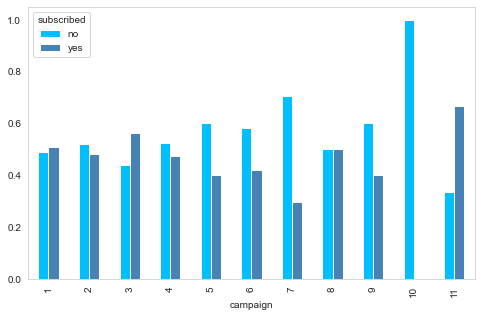

In [78]:
#5.7
draw = pd.crosstab(df.campaign, df.subscribed)
draw.div(draw.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(8, 5))
plt.show()

<h4>Observation 5.7 </h4>The data points refers to the no. of contact for a client has been contacted before this campaign.Fewer no. of contacts are more likely to enroll for term deposit

<h2>6. So was the campaign successful?</h2> Out of 2000 records, there were 1000 subscriptions to the term deposit. 1000 clients did not subscribe. Almost 50% customers who were contacted in the campaign subscribed.

In [79]:
(df["subscribed"] == "yes").sum()

1000

/Users/yuktipatil/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subscribed', ylabel='count'>

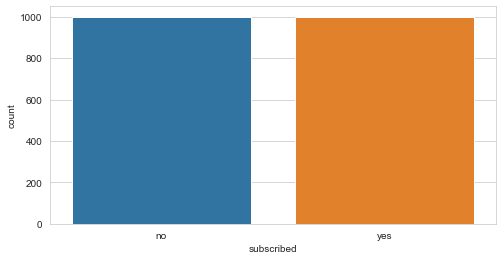

In [80]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
sns.countplot(df['subscribed'])

<h2>7. We have not yet examined all the numerical attributes and a few categorical attributed like loans, default, the days that could affect the customer decision of subscribing to a term deposit.</h2>